Data source: https://www.kaggle.com/datasets/aayushmishra1512/twitchdata

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = 'twitchdata.csv'
data = pd.read_csv(filename)
print(data.head())

    Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     

In [25]:
numeric = data.select_dtypes(include = 'int64').columns.to_list()
print(numeric)
categoric = data.select_dtypes(exclude = 'int64').columns.to_list()
print(categoric)

['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers', 'Followers', 'Followers gained', 'Views gained']
['Channel', 'Partnered', 'Mature', 'Language']


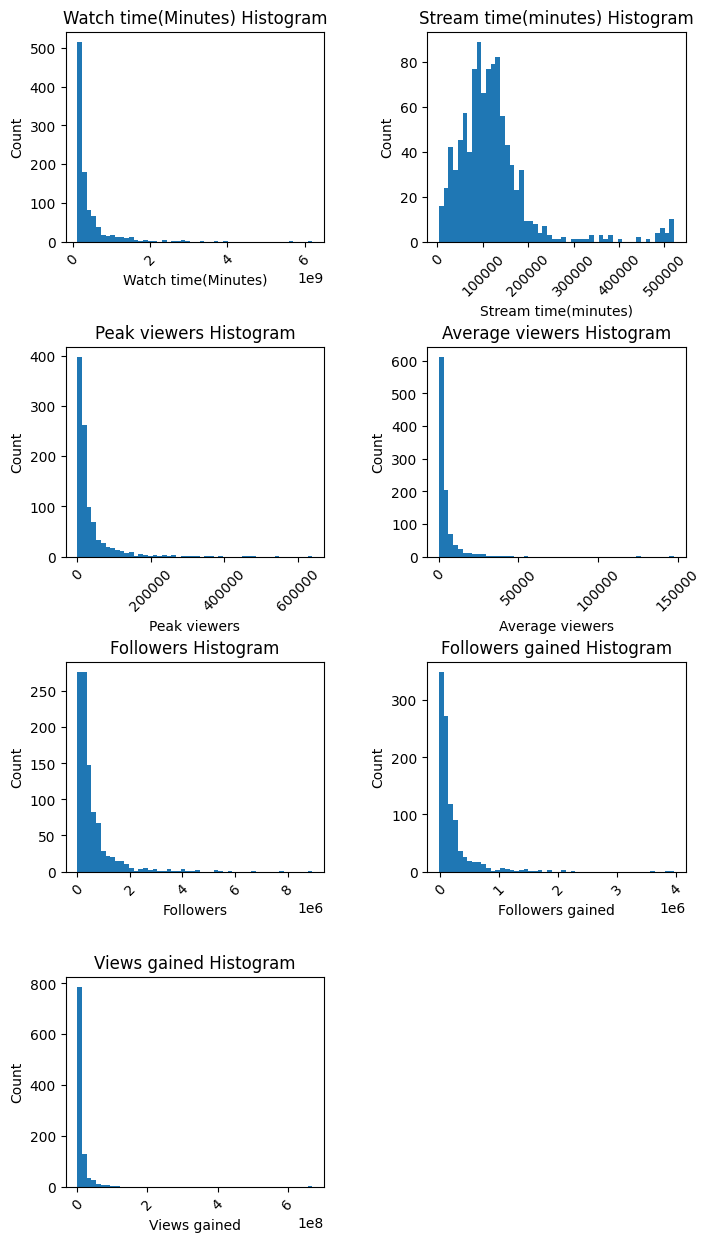

In [80]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
x = y = 0

for col in numeric:
    ax[y][x].hist(data[col], bins=50)

    ax[y][x].set_title(col + " Histogram")
    ax[y][x].set_ylabel("Count")
    ax[y][x].set_xlabel(col)
    ax[y][x].tick_params(axis='x', rotation=45)

    x = (x + 1) % 2
    if x == 0: y += 1
fig.delaxes(ax[y][x])
plt.show()

It's pretty clear most of these have severe outliers.

C:\Users\vi\AppData\Local\Temp\ipykernel_19820\4065989087.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data[numeric], labels=data[numeric].columns, )


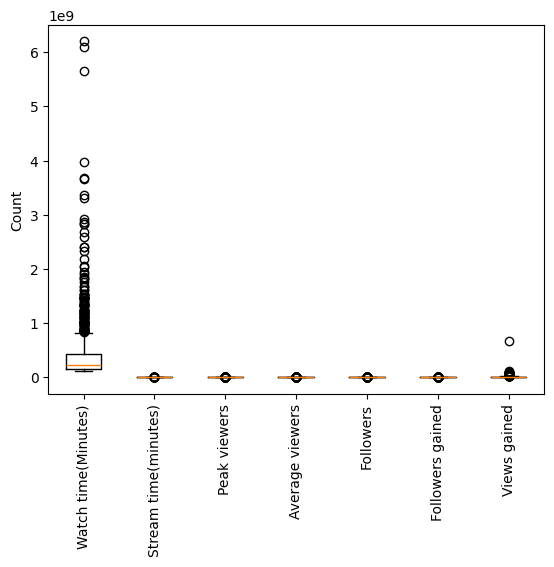

In [ ]:
fix, ax = plt.subplots()
ax.boxplot(data[numeric], labels=data[numeric].columns)
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel("Count")
plt.show()

Watch time makes the other box plots impossible to see. Let's just look at them individually

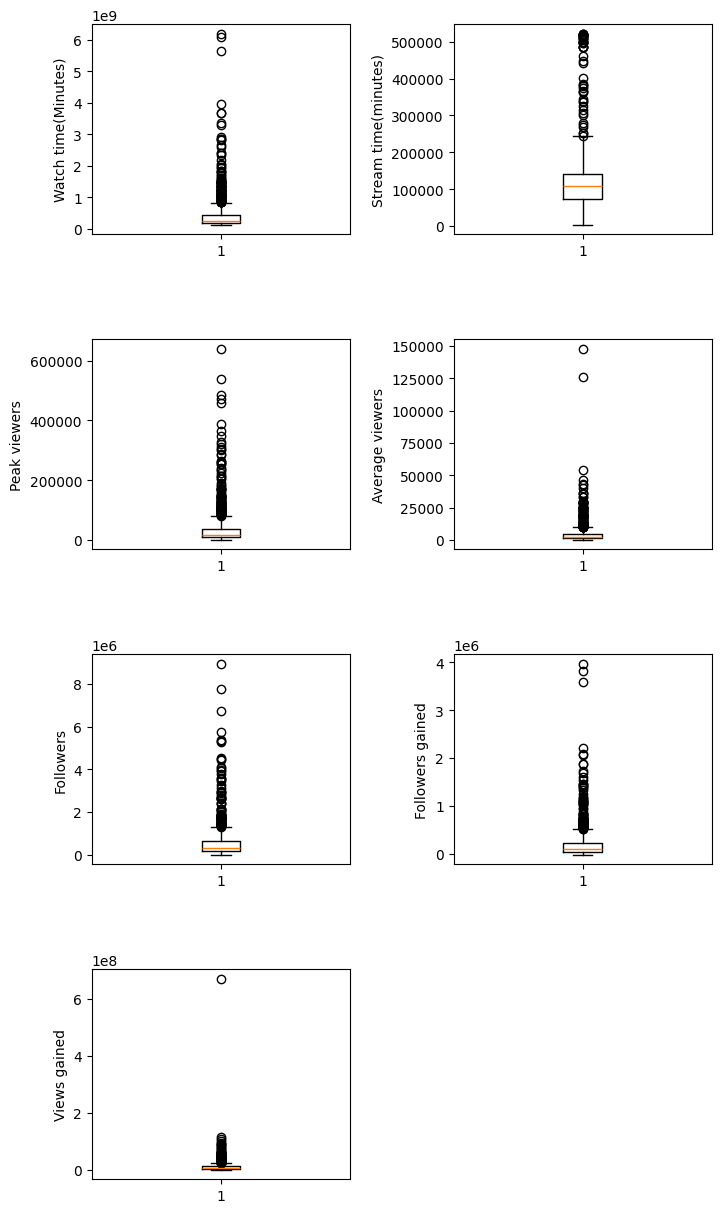

In [90]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(8,15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
x = y = 0

for col in numeric:
    ax[y][x].boxplot(data[col])
    ax[y][x].set_ylabel(col)

    x = (x + 1) % 2
    if x == 0: y += 1
fig.delaxes(ax[y][x])
plt.show()